In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
data=pd.read_csv("C:\\Users\\anupa\\OneDrive - vit.ac.in\\Notebooks\\PROJECTS\\SET\\SURVEY ON INDIAN EDUCATION SYSTEM.csv")

In [3]:
df=pd.DataFrame(data)

In [4]:
# Create new pandas DataFrame.
df2 = df[["Is your chosen course/program your first preference? If not, what was it?"]]
df2.head()

,"Is your chosen course/program your first preference? If not, what was it?"
0,"If not for BTech, I wanted to do Pure Mathemat..."
1,Yes
2,Same course in a better institute
3,Yes
4,"No, it wasn't. MBBS was my first preference"


In [5]:
# Step 1: Cleaning the text
# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', text)
    return text

# Cleaning the text in the review column
df2['Cleaned Reviews'] = df2["Is your chosen course/program your first preference? If not, what was it?"].apply(clean)
print(df2['Cleaned Reviews'])

0      If not for BTech I wanted to do Pure Mathemati...
1                                                   Yes 
2                      Same course in a better institute
3                                                    Yes
4             No it wasn t MBBS was my first preference 
                             ...                        
141                                                  Yes
142    It was nd preference my st preference was stud...
143                                                  Yes
144                                                  Yes
145                                                 Yes 
Name: Cleaned Reviews, Length: 146, dtype: object


<ipython-input-5-19765d8e59d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Cleaned Reviews'] = df2["Is your chosen course/program your first preference? If not, what was it?"].apply(clean)


In [6]:
# Step 2: Tokenization
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [7]:
get_ipython().system('pip install -U textblob')

In [8]:
# POS tagger dictionary

from textblob import TextBlob

pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def pos_tagger(sentence):
    sent = TextBlob(sentence)
    tag_dict = {"J": 'a', "N": 'n', "V": 'v', "R": 'r'}
    words_tags = [(w, tag_dict.get(pos[0], 'n')) for w, pos in sent.tags]   
    lemma_list = [wd.lemmatize(tag) for wd, tag in words_tags]
    return lemma_list

In [9]:
df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)
print(df2['POS tagged'])

def token_stop_pos(list1):
    tags=pos_tag(list1)
    newlist = []
    for word, tag in tags :
        if word.lower() not in set(stopwords.words('english')):
            newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist

df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)
print(df2['POS stopword'])

<ipython-input-9-43a10399ae26>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS tagged'] = df2['Cleaned Reviews'].apply(pos_tagger)


0      [If, not, for, BTech, I, want, to, do, Pure, M...
1                                                  [Yes]
2                 [Same, course, in, a, good, institute]
3                                                  [Yes]
4      [No, it, wasn, t, MBBS, be, my, first, prefere...
                             ...                        
141                                                [Yes]
142    [It, be, nd, preference, my, st, preference, b...
143                                                [Yes]
144                                                [Yes]
145                                                [Yes]
Name: POS tagged, Length: 146, dtype: object
0      [(BTech, n), (want, v), (Pure, n), (Mathematic...
1                                          [(Yes, None)]
2               [(course, n), (good, a), (institute, n)]
3                                          [(Yes, None)]
4               [(MBBS, n), (first, a), (preference, n)]
                             ...           

<ipython-input-9-43a10399ae26>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['POS stopword']=df2['POS tagged'].apply(token_stop_pos)


In [10]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
        if not pos:
            lemma = word
            lemma_rew = lemma_rew + " " + lemma
        else:
            lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
            lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df2['Lemma'] = df2['POS stopword'].apply(lemmatize)
df2.head()

<ipython-input-10-5fc106740a5a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Lemma'] = df2['POS stopword'].apply(lemmatize)


,"Is your chosen course/program your first preference? If not, what was it?",Cleaned Reviews,POS tagged,POS stopword,Lemma
0,"If not for BTech, I wanted to do Pure Mathemat...",If not for BTech I wanted to do Pure Mathemati...,"[If, not, for, BTech, I, want, to, do, Pure, M...","[(BTech, n), (want, v), (Pure, n), (Mathematic...",BTech want Pure Mathematics ISI IISER
1,Yes,Yes,[Yes],"[(Yes, None)]",Yes
2,Same course in a better institute,Same course in a better institute,"[Same, course, in, a, good, institute]","[(course, n), (good, a), (institute, n)]",course good institute
3,Yes,Yes,[Yes],"[(Yes, None)]",Yes
4,"No, it wasn't. MBBS was my first preference",No it wasn t MBBS was my first preference,"[No, it, wasn, t, MBBS, be, my, first, prefere...","[(MBBS, n), (first, a), (preference, n)]",MBBS first preference


In [11]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-11-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-11-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-11-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,"Is your chosen course/program your first preference? If not, what was it?",Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"If not for BTech, I wanted to do Pure Mathemat...",If not for BTech I wanted to do Pure Mathemati...,"[If, not, for, BTech, I, want, to, do, Pure, M...","[(BTech, n), (want, v), (Pure, n), (Mathematic...",BTech want Pure Mathematics ISI IISER,0.500000,0.214286,Positive
1,Yes,Yes,[Yes],"[(Yes, None)]",Yes,0.000000,0.000000,Neutral
2,Same course in a better institute,Same course in a better institute,"[Same, course, in, a, good, institute]","[(course, n), (good, a), (institute, n)]",course good institute,0.600000,0.700000,Positive
3,Yes,Yes,[Yes],"[(Yes, None)]",Yes,0.000000,0.000000,Neutral
4,"No, it wasn't. MBBS was my first preference",No it wasn t MBBS was my first preference,"[No, it, wasn, t, MBBS, be, my, first, prefere...","[(MBBS, n), (first, a), (preference, n)]",MBBS first preference,0.333333,0.250000,Positive


In [12]:
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity 
 #Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
   #Create two new columns ‘Subjectivity’ & ‘Polarity’
df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'
df2['TextBlob_Analysis'] = df2['TextBlob_Polarity'].apply(getAnalysis )
df2.head() 

<ipython-input-12-1e2748cd6fee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Subjectivity'] =  df2['Lemma'].apply(getSubjectivity)
<ipython-input-12-1e2748cd6fee>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TextBlob_Polarity'] = df2['Lemma'].apply(getPolarity)
<ipython-input-12-1e2748cd6fee>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,"Is your chosen course/program your first preference? If not, what was it?",Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
0,"If not for BTech, I wanted to do Pure Mathemat...",If not for BTech I wanted to do Pure Mathemati...,"[If, not, for, BTech, I, want, to, do, Pure, M...","[(BTech, n), (want, v), (Pure, n), (Mathematic...",BTech want Pure Mathematics ISI IISER,0.500000,0.214286,Positive
1,Yes,Yes,[Yes],"[(Yes, None)]",Yes,0.000000,0.000000,Neutral
2,Same course in a better institute,Same course in a better institute,"[Same, course, in, a, good, institute]","[(course, n), (good, a), (institute, n)]",course good institute,0.600000,0.700000,Positive
3,Yes,Yes,[Yes],"[(Yes, None)]",Yes,0.000000,0.000000,Neutral
4,"No, it wasn't. MBBS was my first preference",No it wasn t MBBS was my first preference,"[No, it, wasn, t, MBBS, be, my, first, prefere...","[(MBBS, n), (first, a), (preference, n)]",MBBS first preference,0.333333,0.250000,Positive


In [13]:
tb_counts=df2['TextBlob_Analysis'].value_counts()
print(tb_counts)

Neutral     108
Positive     37
Negative      1
Name: TextBlob_Analysis, dtype: int64


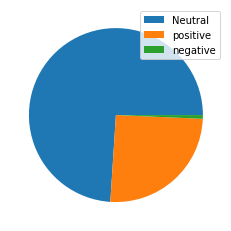

In [14]:
plt.pie(tb_counts)
plt.legend(['Neutral','positive','negative'])
plt.show()

In [15]:
df3=df2.copy()
print(df3.head())

  Is your chosen course/program your first preference? If not, what was it?  \
0  If not for BTech, I wanted to do Pure Mathemat...                          
1                                               Yes                           
2                  Same course in a better institute                          
3                                                Yes                          
4       No, it wasn't. MBBS was my first preference                           

                                     Cleaned Reviews  \
0  If not for BTech I wanted to do Pure Mathemati...   
1                                               Yes    
2                  Same course in a better institute   
3                                                Yes   
4         No it wasn t MBBS was my first preference    

                                          POS tagged  \
0  [If, not, for, BTech, I, want, to, do, Pure, M...   
1                                              [Yes]   
2             [Same,

In [16]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [17]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']
df3['Vader Sentiment'] = df3["Is your chosen course/program your first preference? If not, what was it?"].apply(vadersentimentanalysis)
# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound <= -0.5 :
        return 'Negative'
    else:
        return 'Neutral'
df3['Vader Analysis'] = df3['Vader Sentiment'].apply(vader_analysis)
df3.head()

,"Is your chosen course/program your first preference? If not, what was it?",Cleaned Reviews,POS tagged,POS stopword,Lemma,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis,Vader Sentiment,Vader Analysis
0,"If not for BTech, I wanted to do Pure Mathemat...",If not for BTech I wanted to do Pure Mathemati...,"[If, not, for, BTech, I, want, to, do, Pure, M...","[(BTech, n), (want, v), (Pure, n), (Mathematic...",BTech want Pure Mathematics ISI IISER,0.500000,0.214286,Positive,0.0000,Neutral
1,Yes,Yes,[Yes],"[(Yes, None)]",Yes,0.000000,0.000000,Neutral,0.4019,Neutral
2,Same course in a better institute,Same course in a better institute,"[Same, course, in, a, good, institute]","[(course, n), (good, a), (institute, n)]",course good institute,0.600000,0.700000,Positive,0.4404,Neutral
3,Yes,Yes,[Yes],"[(Yes, None)]",Yes,0.000000,0.000000,Neutral,0.4019,Neutral
4,"No, it wasn't. MBBS was my first preference",No it wasn t MBBS was my first preference,"[No, it, wasn, t, MBBS, be, my, first, prefere...","[(MBBS, n), (first, a), (preference, n)]",MBBS first preference,0.333333,0.250000,Positive,0.0000,Neutral


In [18]:
vader_counts = df3['Vader Analysis'].value_counts()
vader_counts

Neutral     140
Positive      6
Name: Vader Analysis, dtype: int64

In [19]:
nltk.download('sentiwordnet')
from nltk.corpus import sentiwordnet as swn
def sentiwordnetanalysis(pos_data):
    sentiment = 0
    tokens_count = 0
    for word, pos in pos_data:
        if not pos:
            continue
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        if not lemma:
            continue
        synsets = wordnet.synsets(lemma, pos=pos)
        if not synsets:
            continue
            # Take the first sense, the most common
        synset = synsets[0]
        swn_synset = swn.senti_synset(synset.name())
        sentiment += swn_synset.pos_score() - swn_synset.neg_score()
        tokens_count += 1
        print(swn_synset.pos_score(),swn_synset.neg_score(),swn_synset.obj_score())
        if not tokens_count:
            return 0
        if sentiment>0:
            return "Positive"
        if sentiment==0:
            return "Neutral"
        else:
            return "Negative"


[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\anupa\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


In [20]:
df3['SWN analysis'] = df3['POS stopword'].apply(sentiwordnetanalysis)

0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.25 0.0 0.75
0.375 0.0 0.625
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.5 0.0 0.5
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.25 0.75
0.0 0.0 1.0
0.375 0.0 0.625
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.0 0.75
0.0 0.0 1.0
0.875 0.0 0.125
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.0 0.625
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.25 0.5 0.25
0.375 0.0 0.625
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.125 0.875
0.25 0.0 0.75
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.625 0.0 0.375
0.0 0.0 1.0
0.375 0.0 0.625
0.0 0.0 1.0
0.375 0.0 0.625
0.0 0.0 1.0
0.0 0.0 1.0
0.0 0.0 1.0
0.375 0.0 0.625


In [21]:
swn_counts= df3['SWN analysis'].value_counts()
swn_counts

Neutral     51
Positive    21
Negative     3
Name: SWN analysis, dtype: int64

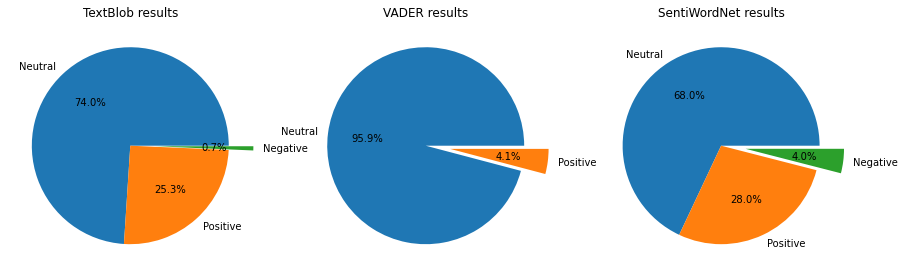

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(15,7))
plt.subplot(1,3,1)
plt.title("TextBlob results")
plt.pie(tb_counts.values, labels = tb_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,2)
plt.title("VADER results")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0.25), autopct='%1.1f%%', shadow=False)
plt.subplot(1,3,3)
plt.title("SentiWordNet results")
plt.pie(swn_counts.values, labels = swn_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)
plt.show()